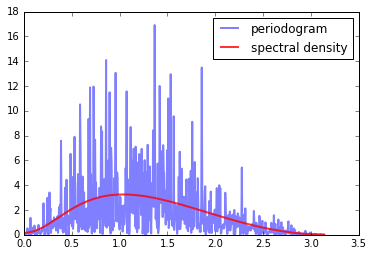

In [5]:
%matplotlib inline
import numpy as np
from numpy.fft import fft

def periodogram(x):
    "argument x is a NumPy array containing the time series data"
    n=len(x)
    I_w=np.abs(fft(x))**2/n
    w=2*np.pi*np.arange(n)/n #fourier frequencies
    w, I_w=w[:int(n/2)], I_w[:int(n/2)] #truncate to interval [0, pi]
    return w, I_w

import matplotlib.pyplot as plt
from quantecon import ARMA

n=1200 #date size
phi, theta=0.5, (0, -0.8) #AR and MA parameters
lp=ARMA(phi, theta)
X=lp.simulation(ts_length=n)

fig, ax=plt.subplots()
x, y=periodogram(X)
ax.plot(x, y, 'b-', lw=2, alpha=0.5, label='periodogram')
x_sd, y_sd=lp.spectral_density(two_pi=False)
ax.plot(x_sd, y_sd, 'r-', lw=2, alpha=0.8, label='spectral density')
ax.legend()
plt.show()

In [ ]:
from pandas import ols, Series

def smooth(x, window_len=7, window='hanning'):
    """
    smooth the data in x using convolution with a window of requested
    size and type
    
    parameters
    ---------
    x: array_like(float)
        a flat NumPy array containing the data to smooth
    window_len: scalar(int), optional
        an odd integer given the length of the window. Defaults to 7
    window: string
        a string giving the window type. possible values are 'flat', 
        'hanning', 'hamming', 'bartlett', or 'blackman'
    
    returns
    ----------
    array_like(float)
        the smoothed values
    
    notes
    ----------
    application of the smoothing window at the top and bottom of x is 
    done  y reflecting x around these points to extend it sufficiently
    in each direction.
    """
    if len(x) < window_len:
        raise ValueError("Input vector length must be >= window length.")
        
    if window_len <3:
        raise ValueError("Window length must be at least 3.")
        
    if not window_len % 2: #window_len is even
        window_len +=1
        print("Window length reset to {}".format(window_len))
        
    windows={'hanning': np.hanning, 
            'hamming': np.hamming,
            'bartlett': np.bartlett,
            'blackman': np.blackman,
            'flat': np.ones  #moving average
            }
    
    #===reflect x around x[0] and x[-1] prior to convolution===#
    k=int(window_len/2)
    xb=x[:k] #first k elements
    xt=x[-k:] #last k elements
    s=np.concatenate((xb[::-1], x, xt[::-1]))